In [1]:
%matplotlib inline
## 551879d06dbf9a4a47345b134c3de56f7b5ced0ba8b52090

In [2]:
import pandas as pd
import numpy as np
import random as rnd

In [3]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from  ggplot import *
# set pandas
pd.set_option('display.width', 1000)

/Users/lihm/Desktop/learn/python_smart/venv3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:14: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


In [4]:
## 导入数据
train_df = pd.read_csv('/Users/lihm/Desktop/learn/python_smart/ML/data/train.csv')
test_df = pd.read_csv('/Users/lihm/Desktop/learn/python_smart/ML/data/test.csv')
combine = [train_df, test_df]

In [5]:
print(train_df.columns.values)

## 离散型的变量有：Survived，Sex 和 Embarked
## 基于序列的有：Pclass
## 连续型的数值特征有：Age，Fare
## 离散型数值有：SibSp，Parch

## PassengerId 整型变量，标识乘客的ID，递增变量，对预测无帮助
## Survived 整型变量，标识该乘客是否幸存。0表示遇难，1表示幸存。将其转换为factor变量比较方便处理
## Pclass 整型变量，标识乘客的社会-经济状态，1代表Upper，2代表Middle，3代表Lower
## Name 字符型变量，除包含姓和名以外，还包含Mr. Mrs. Dr.这样的具有西方文化特点的信息
## Sex 字符型变量，标识乘客性别，适合转换为factor类型变量
## Age 整型变量，标识乘客年龄，有缺失值
## SibSp 整型变量，代表兄弟姐妹及配偶的个数。其中Sib代表Sibling也即兄弟姐妹，Sp代表Spouse也即配偶
## Parch 整型变量，代表父母或子女的个数。其中Par代表Parent也即父母，Ch代表Child也即子女
## Ticket 字符型变量，代表乘客的船票号
## Fare 数值型，代表乘客的船票价
## Cabin 字符型，代表乘客所在的舱位，有缺失值
## Embarked 字符型，代表乘客登船口岸，适合转换为factor型变量

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
train_df.info()
# 有7个特征是int型或float 型。在测试数据集里有6个
# 有5个特征是string（object）类型

# 从以上，我们可以看出：
#  训练集中共有891名乘客
#  891名乘客中，714个乘客具有Age的信息，有177个乘客的Age缺失。
#  891名乘客中，只有204个乘客具有Cabin的信息，有687个乘客的Cabin缺失。

## 相互关系：
## 我们想知道每个特征与Survival的相关性如何。我们希望能够今早的做这一步，并且将这些相关性特征匹配到建模后的相关性特征上。
## 
## 补全数据：
## 我们可能会去补全Age特征下的数据，因为它一定是与存活率是相关的
## 我们可能会去补全Embarked特征下的数据，因为它可能与存活率或者其他重要的特征之间存在相关性
##  
## 
## 修正数据：
## Ticket特征可能需要从我们的分析中丢弃，因为它的数值重复率高达22%，并且Ticket与survival之间很可能并没有联系
## Cabin特征可能也需要丢弃，因为它的数值非常不完整，并且在训练集以及测试集里均包含较多的null值
## PassengerId特征可能也需要被丢弃，因为它对survival没任何作用
## Name特征相对来说不是特别规范，并且很有可能与survival之间没有直接联系，所以可能也应该被丢弃
##  
## 
## 创造数据：
## 我们可以根据Parch和SibSp的特征来创建一个新的Family特征，以此得到每个乘客有多少家庭成员登了船
## 我们可以对Name特征做进一步加工，提取出名字里的Title作为一个新的特征
## 我们可以为Age特征创建一个新的特征，将它原本的连续型数值特征转换为有序的离散型特征
## 我们也可以创建一个票价（Fare）范围的特征，如果它对我们的分析有帮助的话
##  
## 
## 分类：
## 根据之前的问题描述或者已有的数据，我们也可以提出以下假设：
## 
## 女人（Sex=female）更有可能存活
## 孩子（Age<?）也更有可能存活
## 上等仓的乘客（Pclass=1）有更大的存活率

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
## 探索式分析
## 乘客等级越高，存活率越高
train_df[['Pclass', 'Survived']]\
    .groupby(['Pclass'], as_index=False)\
    .mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


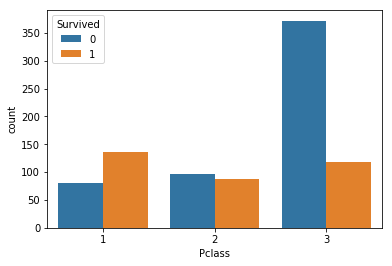

In [12]:
sns.countplot(x='Pclass',hue='Survived',data=train_df)
#  Pclass：我们观察到Pclass=1与Survived的相关性较大（>0.5）

In [13]:
## 乘客性别  女士存活率比男士高
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False)\
    .mean().sort_values(by='Survived', ascending=False)

# Sex：我们可以确认Sex=female有着高达74%的生存率

,Sex,Survived
0,female,0.742038
1,male,0.188908


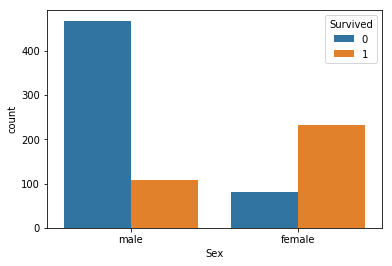

In [14]:
sns.countplot(x='Sex',hue='Survived',data=train_df)

In [15]:
train_df[['SibSp', 'Survived']]\
    .groupby(['SibSp'], as_index=False)\
    .mean().sort_values(by='Survived', ascending=False)
# SibSp为0的乘客，幸存率低于1/3；SibSp为1或2的乘客，幸存率高于50%；SibSp大于等于3的乘客，幸存率非常低

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [16]:
train_df[['Parch', 'Survived']]\
    .groupby(['Parch'], as_index=False)\
    .mean().sort_values(by='Survived', ascending=False)

# 子女个数

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


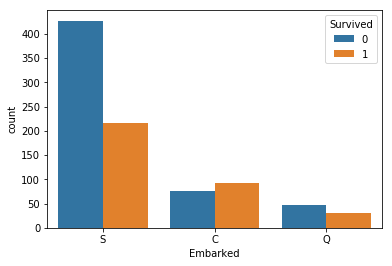

In [17]:
sns.countplot(x='Embarked',hue='Survived',data=train_df) # 代表乘客登船口岸，离散型变量
# C的存活率高

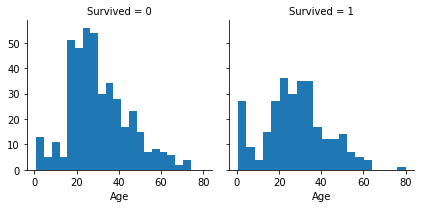

In [18]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)
plt.show()

#观察：
# 婴儿（Age<=4）有较高的生存率
# 老人（Age=80）全部生还
# 大量的15-25年纪的乘客没有生还
# 乘客主要在15-35的年纪范围内

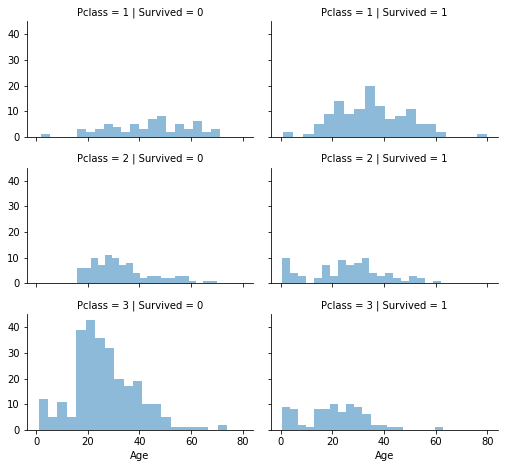

In [19]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()
plt.show()

#观察：
#  Pclass=3 有着最多的乘客，但是他们大多数却没有存活。这也验证了我们之前在“分类”里的假设 #2
#  在Pclass=2和Pclass=3中，大多数婴儿活了下来，进一步验证了我们之前在“分类”里的假设 #2
#  大多数Pclass=1的乘客存活，验证我们之前在“分类”里的假设 #3
#  Pclass根据Age的分布而改变

#结论：
#  考虑将Pclass特征加入模型训练

/Users/lihm/Desktop/learn/python_smart/venv3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


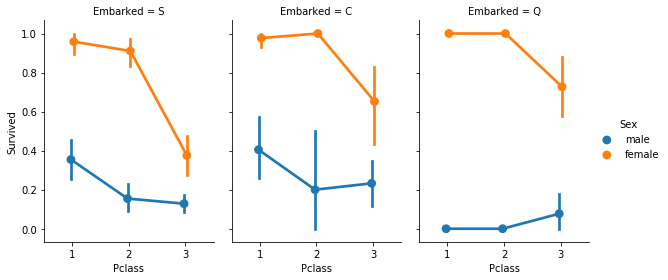

In [20]:
g = sns.catplot(x="Pclass", y="Survived",
              hue="Sex",col="Embarked",
               data=train_df, kind="point",
             dodge=True,
              height=4, aspect=.7);
plt.show()

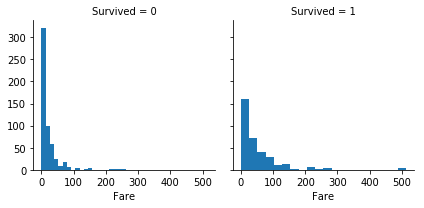

In [21]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Fare', bins=20)
plt.show()

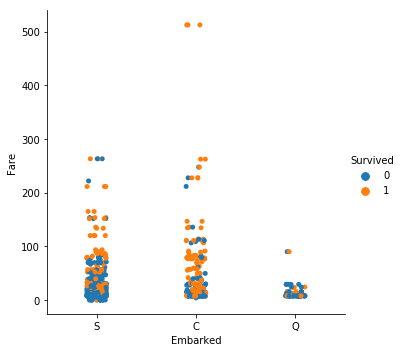

In [22]:
sns.catplot( x='Embarked',y='Fare',hue="Survived", data=train_df)

# 观察：
# 1.	付了高票价的乘客有着更高的生存率，验证了我们之前的假设
# 2.	Embarked与生存率相关，验证了我们之前所做的假设 
# 结论：
# 1.	考虑将Fare特征做不同的区间

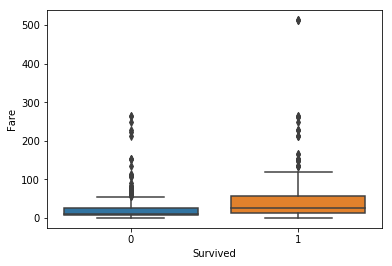

In [23]:
ax = sns.boxplot(x="Survived", y="Fare", data=train_df)

## 

In [24]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)


In [25]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

print('After', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

After (891, 10) (418, 9) (891, 10) (418, 9)


In [26]:
type(combine)
# combine

list

In [27]:
for dataset in combine:
        dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [28]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt',
                                                 'Col', 'Don', 'Dr', 'Major',
                                                 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [29]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [30]:
title_mapping = {"Mr":1, "Miss":2, "Mrs":3, "Master":4, "Rare":5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [31]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [32]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


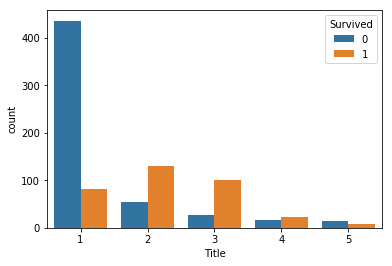

In [33]:
sns.countplot(x='Title',hue='Survived',data=train_df)

In [34]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1, 'male':0}).astype(int)

In [35]:
data = train_df #读取数据，指定“日期”列为索引列

print("相关系数矩阵，即给出了任意两款菜式之间的相关系数:")
print(data.corr())

相关系数矩阵，即给出了任意两款菜式之间的相关系数:
          Survived    Pclass       Sex       Age     SibSp     Parch      Fare     Title
Survived  1.000000 -0.338481  0.543351 -0.077221 -0.035322  0.081629  0.257307  0.407753
Pclass   -0.338481  1.000000 -0.131900 -0.369226  0.083081  0.018443 -0.549500 -0.173929
Sex       0.543351 -0.131900  1.000000 -0.093254  0.114631  0.245489  0.182333  0.502713
Age      -0.077221 -0.369226 -0.093254  1.000000 -0.308247 -0.189119  0.096067 -0.104766
SibSp    -0.035322  0.083081  0.114631 -0.308247  1.000000  0.414838  0.159651  0.269623
Parch     0.081629  0.018443  0.245489 -0.189119  0.414838  1.000000  0.216225  0.315784
Fare      0.257307 -0.549500  0.182333  0.096067  0.159651  0.216225  1.000000  0.136310
Title     0.407753 -0.173929  0.502713 -0.104766  0.269623  0.315784  0.136310  1.000000


In [36]:
guess_ages = np.zeros((2, 3))
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_df.median()
            print(i,j,age_guess)
            guess_ages[i, j] = int(age_guess / 0.5 + 0.5) * 0.5
    for i in range(0, 2):
            for j in range(0, 3):
                dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),
                             'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

0 0 40.0
0 1 30.0
0 2 25.0
1 0 35.0
1 1 28.0
1 2 21.5
0 0 42.0
0 1 28.0
0 2 24.0
1 0 41.0
1 1 24.0
1 2 22.0


In [37]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [38]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)

train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [39]:
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']

In [40]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [41]:
train_df = train_df.drop(['AgeBand'], axis=1)

combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [42]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[ dataset['SibSp'] + dataset['Parch'] + 1==1,'IsAlone']=1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [43]:
train_df = train_df.drop(['Parch', 'SibSp'], axis=1)

test_df = test_df.drop(['Parch', 'SibSp'], axis=1)

combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [44]:
freq_port = train_df.Embarked.dropna().mode()[0]

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

In [45]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [46]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [47]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)

train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [48]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,7.8292,2,1,1
1,893,3,1,2,7.0000,0,3,0
2,894,2,0,3,9.6875,2,1,1
3,895,3,0,1,8.6625,0,1,1
4,896,3,1,1,12.2875,0,3,0


In [49]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [50]:
train_df = train_df.drop(['FareBand'], axis=1)

combine = [train_df, test_df]

train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,1,0
1,1,1,1,2,3,1,3,0
2,1,3,1,1,1,0,2,1
3,1,1,1,2,3,0,3,0
4,0,3,0,2,1,0,1,1
5,0,3,0,1,1,2,1,1
6,0,1,0,3,3,0,1,1
7,0,3,0,0,2,0,4,0
8,1,3,1,1,1,0,3,0
9,1,2,1,0,2,1,3,0


In [51]:
X_train = train_df.drop('Survived', axis=1)
Y_train = train_df['Survived']
X_test = test_df.drop('PassengerId', axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [52]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [53]:
decision_tree = DecisionTreeClassifier(criterion='gini')

decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

acc_decision_tree

86.76

In [54]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)  # 迭代次数

#将最佳算法运用于数据中
random_forest.fit(X_train,Y_train)

Y_pred = random_forest.predict(X_test)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

acc_random_forest

86.76

In [55]:
train_df.to_csv('/Users/lihm/Desktop/learn/python_smart/ML/data/1.csv')

In [56]:
test_df.to_csv('/Users/lihm/Desktop/learn/python_smart/ML/data/test_df.csv')